In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.3.0


In [3]:
hello = tf.constant("Hello ")

In [4]:
world = tf.constant("World")

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [6]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [8]:
print(result)

b'Hello World'


In [9]:
a = tf.constant(10)

In [10]:
b = tf.constant(20)

In [11]:
a + b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [12]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [13]:
print(result)

30


In [14]:
const = tf.constant(10)

In [15]:
fill_mat = tf.fill((4,4),10)

In [16]:
myzeros = tf.zeros((4,4))

In [17]:
myones = tf.ones((4,4))

In [18]:
myrandn = tf.random_normal((4,4), mean=0, stddev=1.0)

In [19]:
myrandu = tf.random_uniform((4,4), minval=0,maxval=1)

In [20]:
myzeros

<tf.Tensor 'zeros:0' shape=(4, 4) dtype=float32>

In [21]:
my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

In [22]:
sess = tf.InteractiveSession()

In [23]:
for op in my_ops:
    print(sess.run(op))
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


[[ 0.32973671 -1.19804454 -0.61172867  0.58638561]
 [-0.62885046 -0.0046296   0.70108587  0.00540727]
 [-1.56031191 -0.78778726 -2.26014853 -0.86813217]
 [-0.87922704 -0.00246517 -0.88477314  0.91448647]]


[[ 0.29522598  0.46855652  0.11484444  0.05416036]
 [ 0.14943457  0.41144788  0.15923047  0.41324461]
 [ 0.17237818  0.06893098  0.83688712  0.03708887]
 [ 0.01075387  0.37528205  0.97978878  0.49760783]]




In [24]:
a = tf.constant([[1,2],
                 [3,4]])

In [25]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [26]:
b = tf.constant([ [10] , [100]])

In [27]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [28]:
result = tf.matmul(a,b)

In [29]:
sess.run(result)

array([[210],
       [430]])

In [30]:
result.eval()

array([[210],
       [430]])

## Tensor Flow Graphs

In [31]:
n1 = tf.constant(1)

In [32]:
n2 = tf.constant(2)

In [33]:
n3 = n1 + n2

In [34]:
with tf.Session() as sess:
    result = sess.run(n3)

In [35]:
print(result)

3


In [36]:
print(n3)

Tensor("add_3:0", shape=(), dtype=int32)


In [37]:
print(tf.get_default_graph())

In [38]:
g = tf.Graph()

In [39]:
print(g)

In [40]:
graph_one = tf.get_default_graph()

In [41]:
print(graph_one)

In [42]:
graph_two = tf.Graph()

In [43]:
print(graph_two)

In [44]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


## variables and Placeholders

In [45]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [46]:
my_tensor = tf.random_uniform((4,4),0,1)

In [47]:
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [48]:
my_var = tf.Variable(initial_value=my_tensor)

In [49]:
init = tf.global_variables_initializer()

In [50]:
sess.run(init)

In [51]:
sess.run(my_var)

array([[ 0.73686707,  0.75951433,  0.92734802,  0.89937055],
       [ 0.53369939,  0.76699972,  0.19535744,  0.63342357],
       [ 0.41054082,  0.41947293,  0.01919818,  0.34757531],
       [ 0.97259152,  0.23703706,  0.69070566,  0.32226682]], dtype=float32)

In [52]:
ph = tf.placeholder(tf.float32)

## Construct Model

In [53]:
import numpy as np
import tensorflow as tf

In [54]:
np.random.seed(101)
tf.set_random_seed(101)

In [55]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [57]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 91.31535577],
       [ 80.7920151 ],
       [ 40.29978307],
       [ 35.72243428],
       [ 95.28767147]])

In [58]:
a = tf.placeholder(tf.float32)

In [59]:
b = tf.placeholder(tf.float32)

In [62]:
add_op = a + b

In [63]:
mul_op = a * b

In [64]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)

30.0


In [65]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)

[[ 142.95521545  148.3821106    94.16277313  108.46752167  159.8430481 ]
 [ 164.18170166  111.48863983  170.15332031  152.94641113   99.78591156]
 [  95.72254181   75.5129776    58.4890213   118.85995483  136.84811401]
 [  58.95780182   44.07857895   96.07727814  108.62171173   63.34631729]
 [ 163.81829834  147.07441711  100.13612366  109.07460022  113.98442078]]


In [67]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[ 142.95521545  148.3821106    94.16277313  108.46752167  159.8430481 ]
 [ 164.18170166  111.48863983  170.15332031  152.94641113   99.78591156]
 [  95.72254181   75.5129776    58.4890213   118.85995483  136.84811401]
 [  58.95780182   44.07857895   96.07727814  108.62171173   63.34631729]
 [ 163.81829834  147.07441711  100.13612366  109.07460022  113.98442078]]


[[ 4715.51220703  5211.07128906   260.01339722  1566.25610352
   6257.63085938]
 [ 6737.22070312  2480.04199219  7219.6796875   5829.49853516
   1534.55505371]
 [ 2233.52514648  1419.08410645   733.0223999   3165.95776367
   3890.87646484]
 [  830.02386475   298.50177002  2156.02197266  2604.13964844   986.7923584 ]
 [ 6530.12451172  4934.63867188   461.99786377  1313.72387695  1781.5690918 ]]


## Example Neural Network

In [69]:
n_features = 10
n_dense_neurons = 3

In [70]:
x = tf.placeholder(tf.float32,(None,n_features))

In [71]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [72]:
xW = tf.matmul(x,W)

In [73]:
z = tf.add(xW,b)

In [74]:
a = tf.sigmoid(z)

In [76]:
init = tf.global_variables_initializer()

In [78]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [79]:
print(layer_out)

[[ 0.94569564  0.64872855  0.19270113]]


## Simple Regression Example

In [81]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [82]:
x_data

array([ -0.67328237,   1.6285857 ,   1.21513159,   3.93744674,
         4.40735011,   6.09758886,   6.73131124,   6.40796786,
         8.0606987 ,  10.22561526])

In [83]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [84]:
y_label

array([-1.13869902,  1.11146125,  1.13625093,  1.99175854,  3.47927521,
        5.38265995,  7.79942864,  9.12557016,  8.82339114,  9.88335803])

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

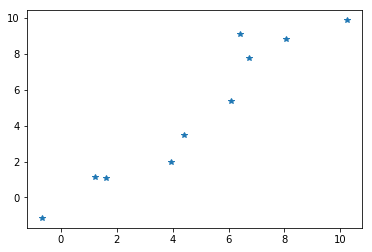

In [87]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [89]:
np.random.rand(2)

array([ 0.63728903,  0.324608  ])

In [90]:
m = tf.Variable(0.63)
b = tf.Variable(0.87)

In [92]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [93]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [94]:
init = tf.global_variables_initializer()

In [97]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

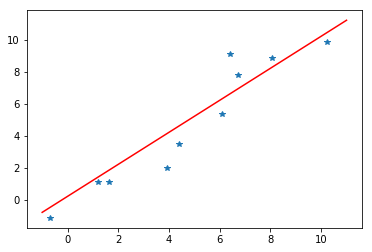

In [98]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')

## Regression in Realistic Data Set

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
import tensorflow as tf

In [101]:
x_data = np.linspace(0.0,10.0,1000000)

In [102]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [103]:
noise = np.random.randn(len(x_data))

In [104]:
noise

array([ 1.13102858,  0.49860031,  1.17902193, ...,  1.22287437,
        0.88768899,  1.2661491 ])

y = mx + b 

b = 5

In [105]:
y_true = (0.5 * x_data) + 5 + noise

In [106]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [107]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [108]:
my_data = pd.concat([x_df,y_df],axis=1)

In [109]:
my_data.head()

,X Data,Y
0,0.00000,6.131029
1,0.00001,5.498605
2,0.00002,6.179032
3,0.00003,6.322699
4,0.00004,6.852175


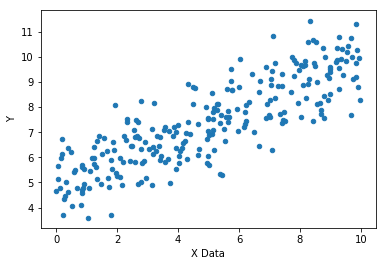

In [110]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [111]:
batch_size = 8

In [114]:
np.random.randn(2)

array([ 0.63993617, -1.12572294])

In [118]:
m = tf.Variable(0.63)
b = tf.Variable(1.12)

In [119]:
xph = tf.placeholder(tf.float32,[batch_size])

In [120]:
yph = tf.placeholder(tf.float32,[batch_size])

In [121]:
y_model = m*xph + b

In [122]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [124]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [125]:
init = tf.global_variables_initializer()

In [126]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [127]:
model_m

0.50992066

In [128]:
model_b

4.973434

In [129]:
y_hat = x_data*model_m + model_b

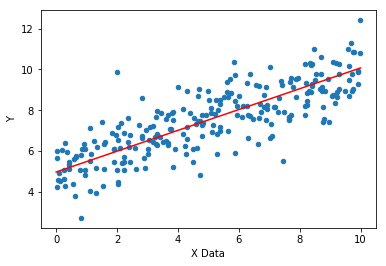

In [130]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')